### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 1.0.5
Versão Numpy: 1.17.4


### Bibliotecas de visualização

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use(['ggplot'])

print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Seaborn: 0.10.1
Versão Matplotlib: 3.2.1


### Carregamento dos dados: MNIST

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [4]:
X, y = mnist['data'], mnist['target']

print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')

Shape X: (70000, 784)
Shape y: (70000,)


### Exemplo

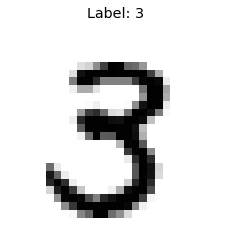

In [5]:
idx = 65356
some_digits = X[idx]
some_digits_image = some_digits.reshape(28, 28)

plt.imshow(some_digits_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.title(f'Label: {str(y[idx])}')
plt.axis('off')
plt.show()

### Mais alguns dígitos

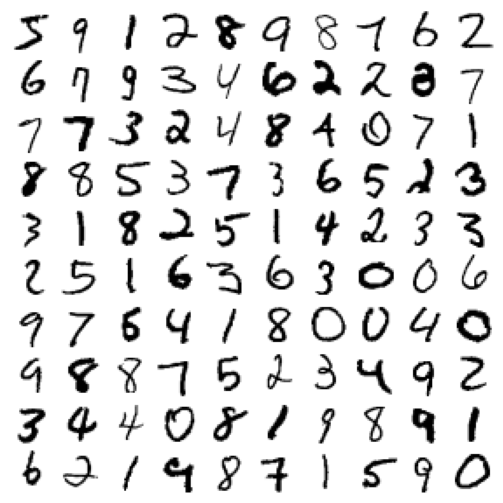

In [6]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
    
    

plt.figure(figsize=(9, 9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

### Separação dos dados

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_test shape:  {y_test.shape}')

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)


### Embaralhando os dados

In [8]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Treinando um classificador binário para o dígito 3

In [9]:
y_train_3 = (y_train == 3)
y_test_3  = (y_test == 3)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_3)

sgd_clf.predict([some_digits])

array([ True])

### Medidas de desempenho

#### Implementando a validação cruzada

In [20]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3, random_state=42)
scores = []

for train_index, test_index in skfolds.split(X_train, y_train_3):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_3[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_3[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    scores.append(n_correct/len(y_pred))
    
print(scores)   
print(f'Score: {np.mean(score)}')

[0.96065, 0.95675, 0.96755]
Score: 0.9616500000000001


#### Validação cruzada

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring='accuracy')

array([0.96065, 0.95675, 0.96755])

#### Gerando previsões

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

array([False, False, False, ..., False, False, False])

#### Matriz de confusão

In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_3, y_train_pred))

[[52938   931]
 [ 1370  4761]]
